In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
import scikitplot as skplt
from collections import Counter
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,BaseNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.svm import NuSVC,NuSVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor,
                              AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve,
                             auc,
                             confusion_matrix,
                             recall_score,
                             roc_auc_score,
                             accuracy_score,
                             balanced_accuracy_score,
                             classification_report,
                             f1_score,
                             precision_recall_fscore_support)
from sklearn.preprocessing import label_binarize,OneHotEncoder,MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
%matplotlib inline

Using TensorFlow backend.


In [2]:
def make_meshgrid(x, y, h=.02):

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",verticalalignment ="center",fontsize=30,multialignment="center"
                 ,color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [3]:
# some global variables
n_neighbors = 3
models = {'Naive Bayes':[],
          'KNN':[],
          'LDA':[],
          'QDA':[],
          'Linear SVM':[],
          'Non Linear SVM':[],
          'Logistic Regression':[],
          'CART':[],
          'Random Forest':[],
          'AdaBoost':[],
          'GradBoost':[]}

In [8]:
#Loading the data
spiral = pd.read_table('D:/m2/app_sup/projet_app_sup_20/Datasets_projet_MLDS/spiral.txt',delimiter='\t', header=None)
spiral

,0,1,2
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


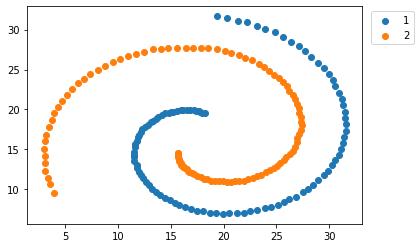

In [9]:
fig, ax = plt.subplots(1, 1)
for x in range(1,3):
    ax.scatter(x = spiral[0][spiral[2] == x], y = spiral[1][spiral[2] == x], label=str(x))
ax.legend(loc=1, bbox_to_anchor=(1.17,1))

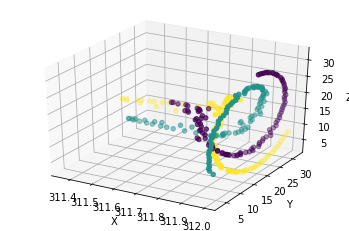

In [11]:
X = spiral.iloc[:,0:2]
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

import numpy as np
from scipy.spatial.distance import pdist, squareform
gamma = 2
K = squareform(np.exp(-gamma * pdist(X, 'sqeuclidean')))
D = np.exp(-(K ** 2) / ( 2*gamma**2))
z = np.sum(D, axis=0)

a = spiral[0]
b = spiral[1]
c = z
ax.scatter( c, a, b, c=spiral[2], marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [12]:
x = spiral.values[:,:-1] #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
spiral = pd.concat([pd.DataFrame(x_scaled),spiral.iloc[:,-1]],axis=1)
spiral

,0,1,2
0,1.000000,0.175652,3
1,0.972366,0.153043,3
2,0.948187,0.130435,3
3,0.922280,0.107826,3
4,0.894646,0.092174,3
...,...,...,...
307,0.440415,0.380870,2
308,0.436960,0.387826,2
309,0.436960,0.394783,2
310,0.436960,0.403478,2


In [7]:
def results_report(model,y_true):
    metrics={'acc':0,
         'bal_acc':0,
         'recall':0,
         'f_1_score':0,
         'roc_auc_score':0}
    y_pred = model.predict(x_te)
    metrics['acc']=accuracy_score(y_te,y_pred)
    metrics['bal_acc']=accuracy_score(y_te,y_pred)
    metrics['recall']=recall_score(y_te,y_pred,average='macro')
    metrics['f_1_score']=f1_score(y_te,y_pred,average='macro')
    classes = list(set(y_true).union(set(y_pred)))
    metrics['roc_auc_score']=roc_auc_score(label_binarize(y_te,classes),label_binarize(y_pred,classes))
    
    plt.bar(metrics.keys(),metrics.values())
    plt.show()
    return metrics
    
def plot_curves(model,y_true,x_te):
    y_pred = model.predict(x_te)
    #y_pred = model.predict(x_te)
    cnf_matrix = confusion_matrix(y_true,y_pred)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['have_card','No_card'],
                      title='Confusion matrix')
    predict_proba = getattr(model, "predict_proba", None)
    if callable(predict_proba):
        y_probas = model.predict_proba(x_te)
        skplt.metrics.plot_roc(y_true, y_probas)
        skplt.metrics.plot_precision_recall_curve(y_true,y_probas)

Resampled dataset shape Counter({3.0: 105, 2.0: 105, 1.0: 101})


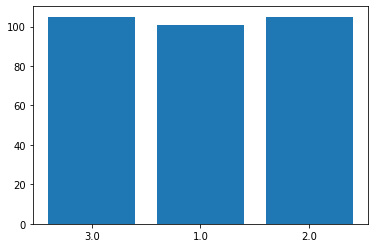

In [8]:
bl = Counter(spiral.values[:,-1])
print('Resampled dataset shape %s' % bl)
plt.bar([str(k) for k in bl.keys()],bl.values(),align='center')
plt.show()

Resampled dataset shape Counter({3.0: 106, 1.0: 106, 2.0: 106})


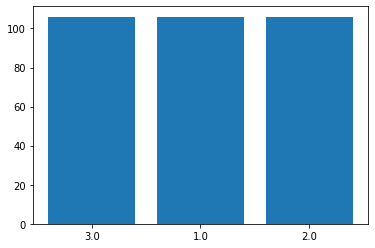

In [13]:
# ooversampling data
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(spiral.values[:,:-1],spiral.values[:,-1])
bl_os=Counter(Y)
print('Resampled dataset shape %s' % bl_os)
plt.bar([str(k) for k in bl_os.keys()],bl_os.values(),align='center')
plt.show()

In [10]:
# splittign the dataset
x_t,x_te,y_t,y_te = train_test_split(X,
                                     Y,
                                     test_size=0.33, 
                                     random_state=42)


# Naive Bayes

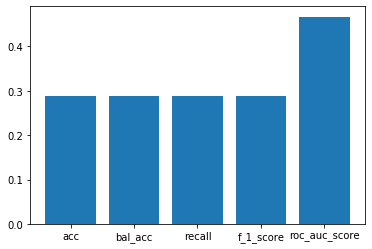

{'acc': 0.28846153846153844, 'bal_acc': 0.28846153846153844, 'recall': 0.28879551820728294, 'f_1_score': 0.28834449422684716, 'roc_auc_score': 0.46665448788210934}
              precision    recall  f1-score   support

         1.0       0.28      0.32      0.30        34
         2.0       0.32      0.29      0.30        35
         3.0       0.27      0.26      0.26        35

    accuracy                           0.29       104
   macro avg       0.29      0.29      0.29       104
weighted avg       0.29      0.29      0.29       104



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


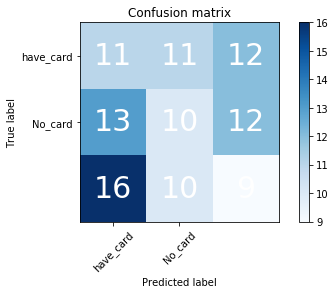

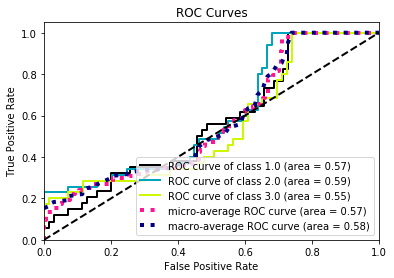

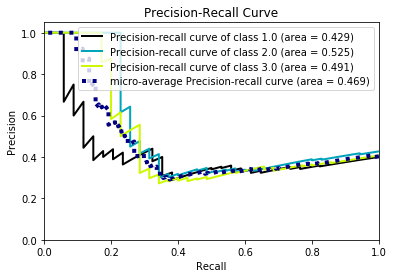

In [11]:
NB_model = GaussianNB()
# fitting the model
NB_model.fit(x_t,y_t)
#evaluating the model
r = results_report(NB_model,y_te)
print(r)
models['Naive Bayes']=r
y_pred = NB_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(NB_model,y_te,x_te)

In [12]:
# KNN

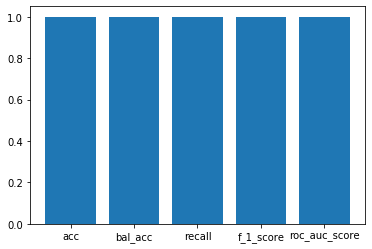

{'acc': 1.0, 'bal_acc': 1.0, 'recall': 1.0, 'f_1_score': 1.0, 'roc_auc_score': 1.0}
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        34
         2.0       1.00      1.00      1.00        35
         3.0       1.00      1.00      1.00        35

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


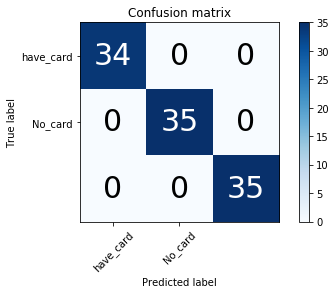

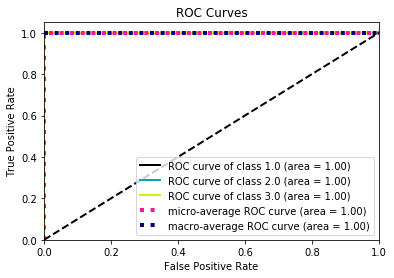

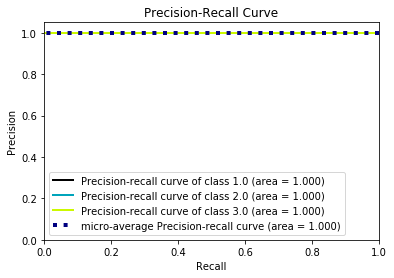

In [13]:
KNN_model = KNeighborsClassifier(n_neighbors)
KNN_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(KNN_model,y_te)
print(r)
models['KNN']=r
y_pred = KNN_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(KNN_model,y_te,x_te)

In [14]:
# LDA

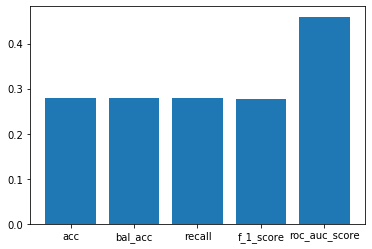

{'acc': 0.27884615384615385, 'bal_acc': 0.27884615384615385, 'recall': 0.2792717086834734, 'f_1_score': 0.2776705276705277, 'roc_auc_score': 0.4594771241830065}
              precision    recall  f1-score   support

         1.0       0.28      0.32      0.30        34
         2.0       0.28      0.23      0.25        35
         3.0       0.29      0.29      0.29        35

    accuracy                           0.28       104
   macro avg       0.28      0.28      0.28       104
weighted avg       0.28      0.28      0.28       104



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


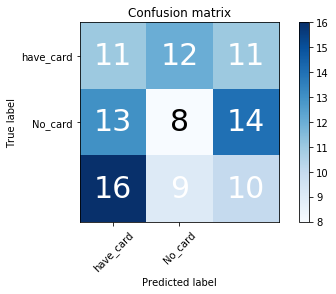

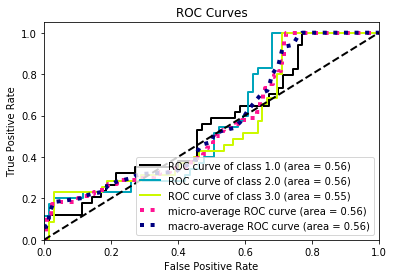

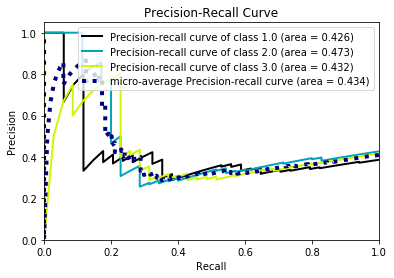

In [15]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(LDA_model,y_te)
print(r)
models['LDA']=r
y_pred = LDA_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(LDA_model,y_te,x_te)

In [16]:
# QDA

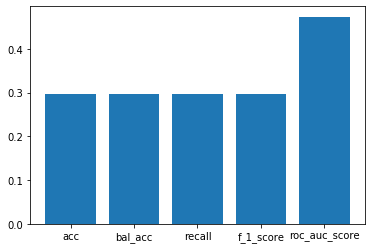

{'acc': 0.2980769230769231, 'bal_acc': 0.2980769230769231, 'recall': 0.2977591036414566, 'f_1_score': 0.2961205987771453, 'roc_auc_score': 0.4734137133114115}
              precision    recall  f1-score   support

         1.0       0.26      0.26      0.26        34
         2.0       0.33      0.26      0.29        35
         3.0       0.30      0.37      0.33        35

    accuracy                           0.30       104
   macro avg       0.30      0.30      0.30       104
weighted avg       0.30      0.30      0.30       104



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


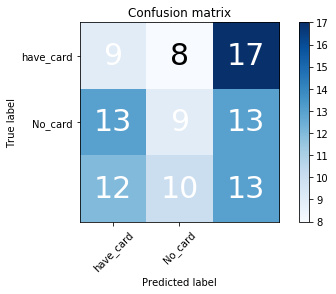

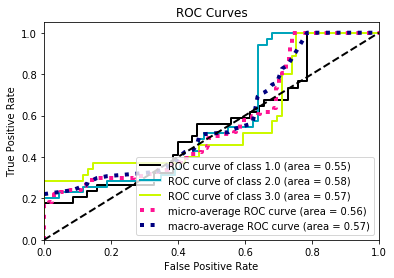

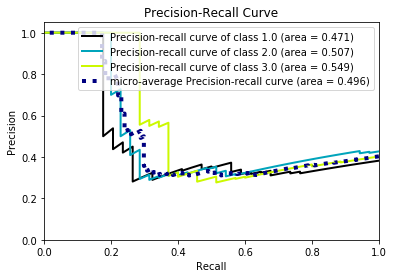

In [17]:
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(QDA_model,y_te)
print(r)
models['QDA']=r
y_pred = QDA_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(QDA_model,y_te,x_te)

In [18]:
#Linear SVM

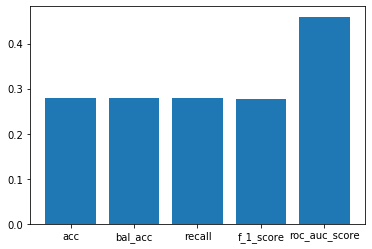

{'acc': 0.27884615384615385, 'bal_acc': 0.27884615384615385, 'recall': 0.2792717086834734, 'f_1_score': 0.2776705276705277, 'roc_auc_score': 0.4594771241830065}
              precision    recall  f1-score   support

         1.0       0.28      0.32      0.30        34
         2.0       0.28      0.23      0.25        35
         3.0       0.29      0.29      0.29        35

    accuracy                           0.28       104
   macro avg       0.28      0.28      0.28       104
weighted avg       0.28      0.28      0.28       104



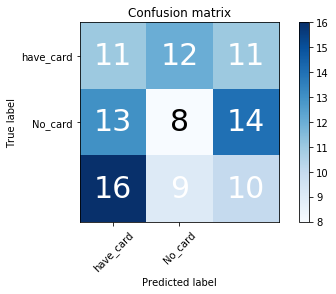

In [19]:
LSVM_model = LinearSVC()
LSVM_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(LSVM_model,y_te)
print(r)
models['Linear SVM']=r
y_pred = LSVM_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(LSVM_model,y_te,x_te)

In [20]:
# Non Linear SVM

D:\annaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


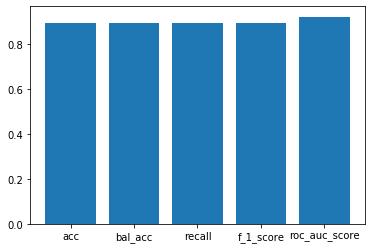

{'acc': 0.8942307692307693, 'bal_acc': 0.8942307692307693, 'recall': 0.8949579831932774, 'f_1_score': 0.892479017943276, 'roc_auc_score': 0.9211159826249341}
              precision    recall  f1-score   support

         1.0       0.85      0.97      0.90        34
         2.0       0.93      0.77      0.84        35
         3.0       0.92      0.94      0.93        35

    accuracy                           0.89       104
   macro avg       0.90      0.89      0.89       104
weighted avg       0.90      0.89      0.89       104



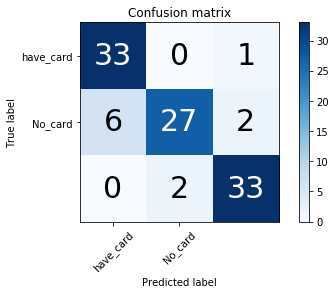

In [21]:
NLSVM_model = NuSVC()
NLSVM_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(NLSVM_model,y_te)
print(r)
models['Non Linear SVM']=r
y_pred = NLSVM_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(NLSVM_model,y_te,x_te)

In [22]:
# Logistic Regression

D:\annaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\annaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


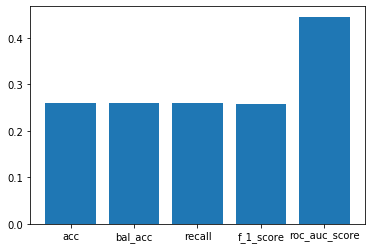

{'acc': 0.25961538461538464, 'bal_acc': 0.25961538461538464, 'recall': 0.26022408963585436, 'f_1_score': 0.25826043237807944, 'roc_auc_score': 0.4451569033410465}
              precision    recall  f1-score   support

         1.0       0.27      0.32      0.29        34
         2.0       0.27      0.23      0.25        35
         3.0       0.24      0.23      0.24        35

    accuracy                           0.26       104
   macro avg       0.26      0.26      0.26       104
weighted avg       0.26      0.26      0.26       104



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


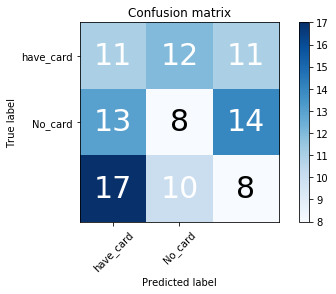

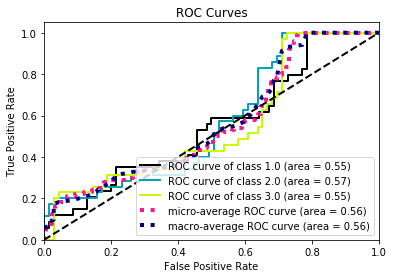

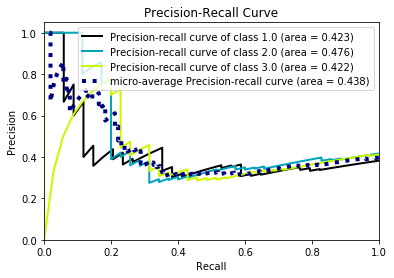

In [23]:
LR_model = LogisticRegression()
LR_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(LR_model,y_te)
print(r)
models['Logistic Regression']=r
y_pred = LR_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(LR_model,y_te,x_te)  

In [24]:
# Cart

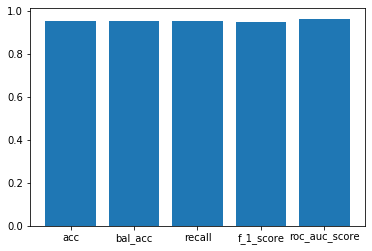

{'acc': 0.9519230769230769, 'bal_acc': 0.9519230769230769, 'recall': 0.9521008403361345, 'f_1_score': 0.9514911014911015, 'roc_auc_score': 0.964076645150814}
              precision    recall  f1-score   support

         1.0       0.92      0.97      0.94        34
         2.0       0.95      1.00      0.97        35
         3.0       1.00      0.89      0.94        35

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


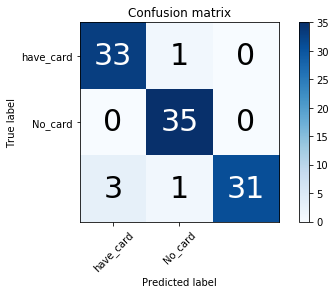

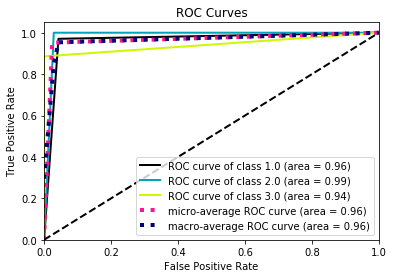

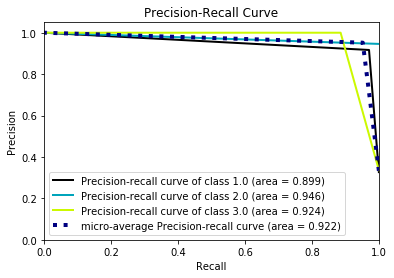

In [25]:
CART_model = DecisionTreeClassifier()
CART_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(CART_model,y_te)
print(r)
models['CART']=r
y_pred = CART_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(CART_model,y_te,x_te)  

D:\annaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


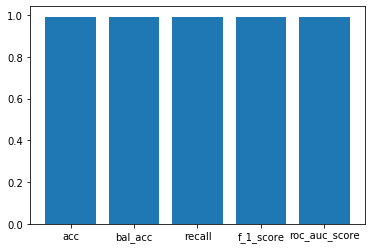

{'acc': 0.9903846153846154, 'bal_acc': 0.9903846153846154, 'recall': 0.9901960784313726, 'f_1_score': 0.9903300399411393, 'roc_auc_score': 0.9926825802784882}
              precision    recall  f1-score   support

         1.0       1.00      0.97      0.99        34
         2.0       0.97      1.00      0.99        35
         3.0       1.00      1.00      1.00        35

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


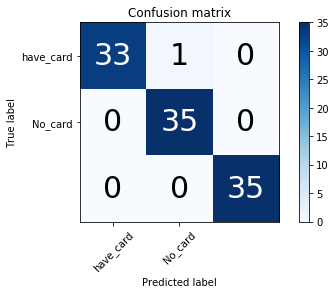

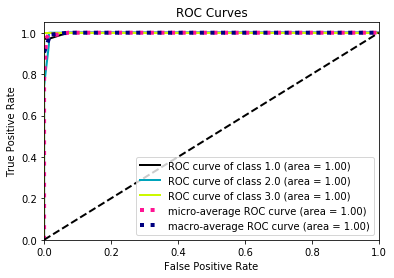

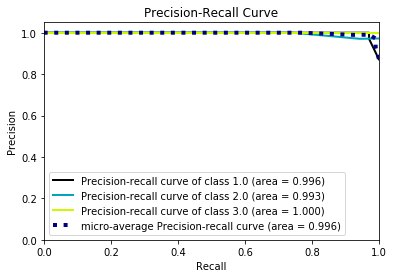

In [26]:
# Random forest
RF_model = RandomForestClassifier()
RF_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(RF_model,y_te)
print(r)
models['Random Forest']=r
y_pred = RF_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(RF_model,y_te,x_te)

In [27]:
# Ada boost

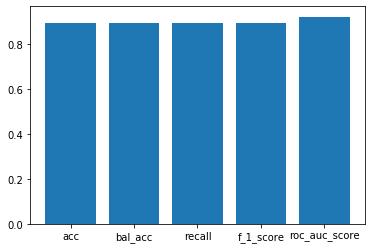

{'acc': 0.8942307692307693, 'bal_acc': 0.8942307692307693, 'recall': 0.8941176470588235, 'f_1_score': 0.8942461246592942, 'roc_auc_score': 0.9206613080014615}
              precision    recall  f1-score   support

         1.0       0.86      0.88      0.87        34
         2.0       0.89      0.91      0.90        35
         3.0       0.94      0.89      0.91        35

    accuracy                           0.89       104
   macro avg       0.90      0.89      0.89       104
weighted avg       0.90      0.89      0.89       104



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


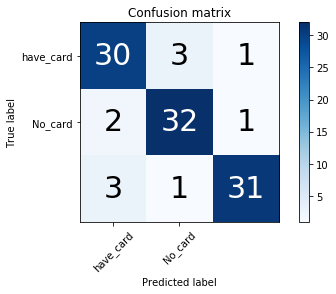

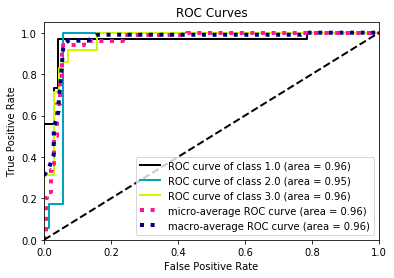

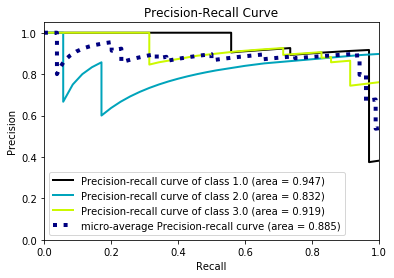

In [28]:
AB_model = AdaBoostClassifier()
AB_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(AB_model,y_te)
print(r)
models['AdaBoost']=r
y_pred = AB_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(AB_model,y_te,x_te)

In [29]:
# Gradient boosting

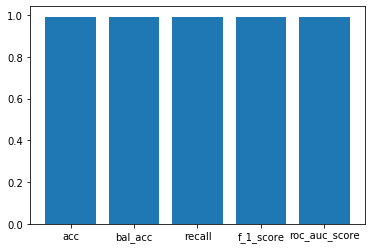

{'acc': 0.9903846153846154, 'bal_acc': 0.9903846153846154, 'recall': 0.9901960784313726, 'f_1_score': 0.9903300399411393, 'roc_auc_score': 0.9926825802784882}
              precision    recall  f1-score   support

         1.0       1.00      0.97      0.99        34
         2.0       0.97      1.00      0.99        35
         3.0       1.00      1.00      1.00        35

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


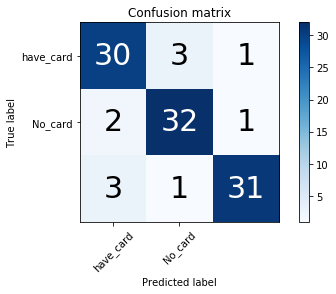

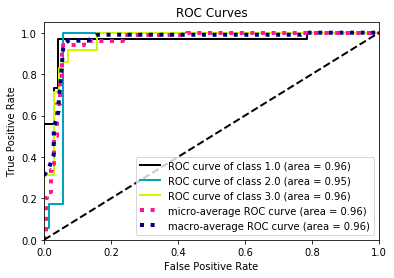

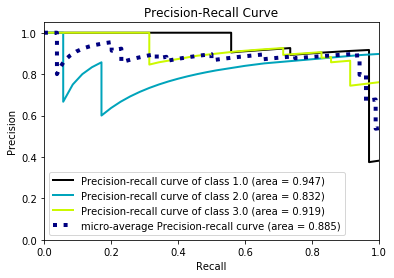

In [30]:
GB_model = GradientBoostingClassifier()
GB_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(GB_model,y_te)
print(r)
models['GradBoost']=r
y_pred = GB_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(spiral.values[:,-1]))))
plot_curves(AB_model,y_te,x_te)

In [31]:
m = pd.DataFrame.from_dict(models).T
m = m.sort_values(by =list(m),ascending=False)
m

,acc,bal_acc,recall,f_1_score,roc_auc_score
KNN,1.000000,1.000000,1.000000,1.000000,1.000000
Random Forest,0.990385,0.990385,0.990196,0.990330,0.992683
GradBoost,0.990385,0.990385,0.990196,0.990330,0.992683
CART,0.951923,0.951923,0.952101,0.951491,0.964077
Non Linear SVM,0.894231,0.894231,0.894958,0.892479,0.921116
AdaBoost,0.894231,0.894231,0.894118,0.894246,0.920661
QDA,0.298077,0.298077,0.297759,0.296121,0.473414
Naive Bayes,0.288462,0.288462,0.288796,0.288344,0.466654
LDA,0.278846,0.278846,0.279272,0.277671,0.459477
Linear SVM,0.278846,0.278846,0.279272,0.277671,0.459477


In [14]:
import warnings
warnings.filterwarnings('ignore')
titles = ('Naive Bayes',
          'KNN',
          'LDA',
          'QDA')
models_fit = (GaussianNB(),
          KNeighborsClassifier(n_neighbors),
          LinearDiscriminantAnalysis(),
          QuadraticDiscriminantAnalysis(),
        )
models_fit = (clf.fit(X, Y) for clf in models_fit)

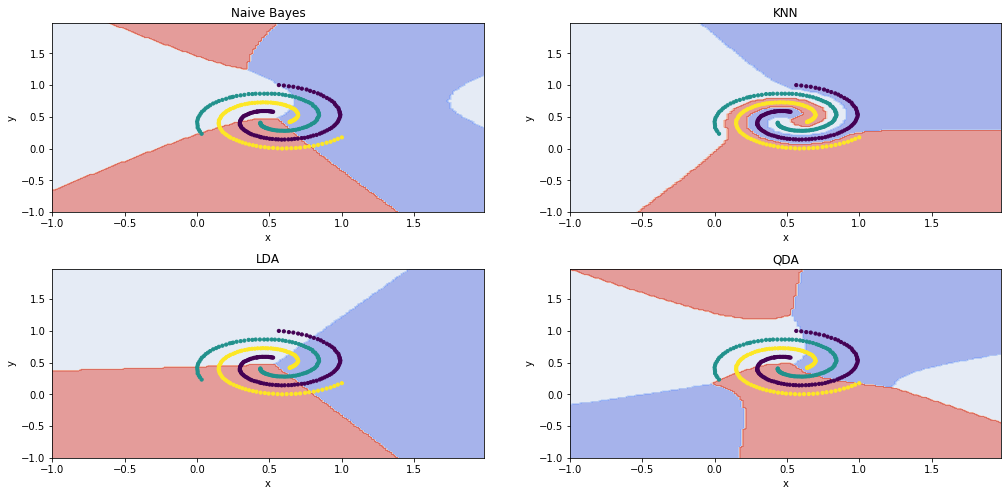

In [15]:
fig, sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.2, hspace=0.3)
fig.set_size_inches(17,8)

X0, X1 = X[:,0], X[:,1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models_fit, titles, sub.flatten()):
    
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.5)
    ax.scatter(X0, X1, c=Y, s=10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.set_title(title)

plt.show()

In [16]:
titles = (
          'Linear SVM',
          'Non Linear SVM',
          'Logistic Regression',
          'CART')
models_fit = (
         LinearSVC(),
         NuSVC(),
         LogisticRegression(),
         DecisionTreeClassifier(),
         )       

models_fit = (clf.fit(X, Y) for clf in models_fit)

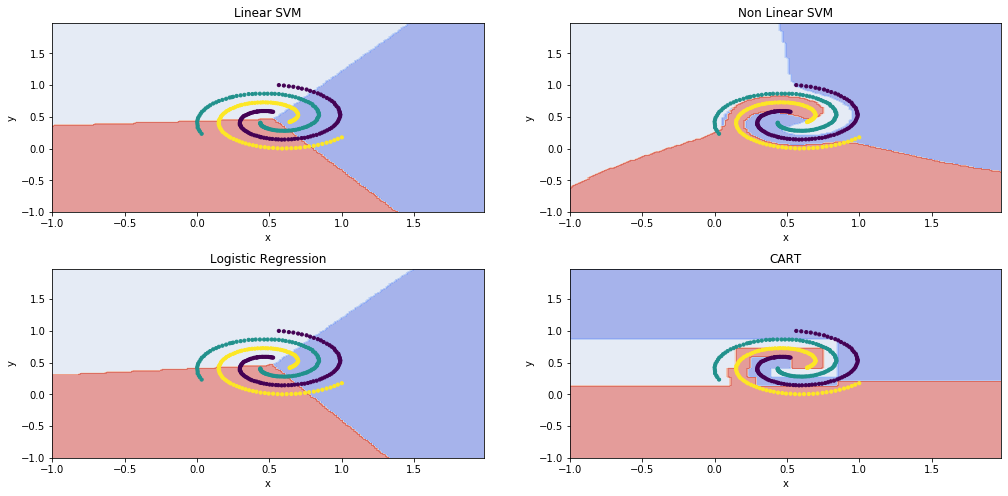

In [17]:

fig, sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.2, hspace=0.3)
fig.set_size_inches(17,8)

X0, X1 = X[:,0], X[:,1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models_fit, titles, sub.flatten()):
    
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.5)
    ax.scatter(X0, X1, c=Y, s=10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.set_title(title)

plt.show()

In [18]:
titles = (
          'Random Forest',  'AdaBoost',
          'GradBoost')

models_fit = (
         RandomForestClassifier(),
         AdaBoostClassifier(),
         GradientBoostingClassifier())
models_fit = (clf.fit(X, Y) for clf in models_fit)

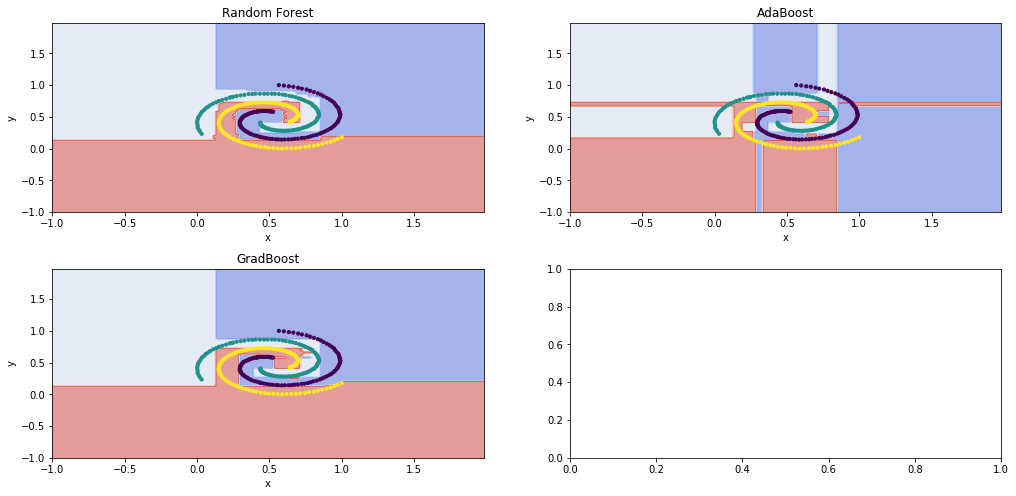

In [19]:
fig, sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.2, hspace=0.3)
fig.set_size_inches(17,8)

X0, X1 = X[:,0], X[:,1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models_fit, titles, sub.flatten()):
    
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.5)
    ax.scatter(X0, X1, c=Y, s=10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.set_title(title)

plt.show()